In [12]:
import pandas as pd

# Votre fichier CSV
csv_file_path = '../data/dailyukflights.csv'

# Mapping des mois
mois_mapping = {
    'janv': '01',
    'févr': '02',
    'mars': '03',
    'avr': '04',
    'mai': '05',
    'juin': '06',
    'juil': '07',
    'août': '08',
    'sept': '09',
    'oct': '10',
    'nov': '11',
    'déc': '12'
}

# Charger le fichier CSV en utilisant pandas
df = pd.read_csv(csv_file_path, delimiter=';')

# Fonction pour convertir les dates
def convert_date(date_str):
    day, mois, year = date_str.split()
    return f'{year}-{mois_mapping[mois]}-{day}'

# Appliquer la conversion des dates
df['Date'] = df['Date'].apply(convert_date)

# Convertir la colonne 'Date' en format datetime
df['Date'] = pd.to_datetime(df['Date'])

#Convertir nb of flights en int
df['Number of flights'] = df['Number of flights'].str.replace('\D', '', regex=True).astype(int)

df = df.rename(columns={'Date': 'date', 'Number of flights': 'flights'})

# Afficher le DataFrame avec les dates modifiées
print(df)


           date  flights
0    2019-01-02     5147
1    2019-01-03     5518
2    2019-01-04     5588
3    2019-01-05     4798
4    2019-01-06     5329
...         ...      ...
1876 2024-02-21     4195
1877 2024-02-22     4775
1878 2024-02-23     5235
1879 2024-02-24     4575
1880 2024-02-25     4981

[1881 rows x 2 columns]


In [14]:
print('type date : ',type(df['date'].values[0]))
print('type number : ',type(df['flights'].values[0]))

type date :  <class 'numpy.datetime64'>
type number :  <class 'numpy.int64'>


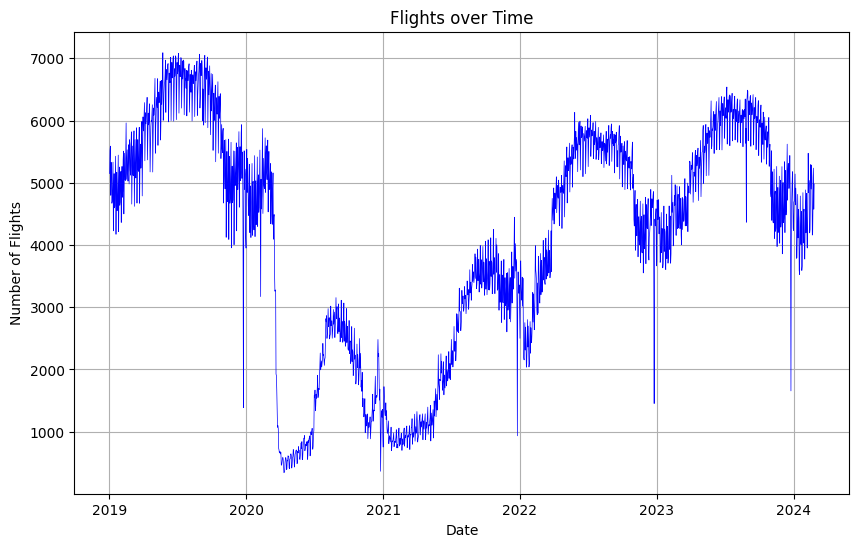

In [25]:
import matplotlib.pyplot as plt

# Tracer le graphique
plt.figure(figsize=(10, 6),dpi=100)
plt.plot(df['date'], df['flights'], linestyle='-', color='b', linewidth=0.5)

# Ajouter des étiquettes et un titre
plt.title('Flights over Time')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.grid(True)

# Afficher le graphique
plt.show()